In [1]:
from tone_task import *

In [2]:
# tones from a sample experiment
trial_tones = task()
print(trial_tones)

[[2, 4.813074057024731, 8], [6.800915876007124, 3, 5.331691599702452], [3.0294367348202442, 3.7718774334840095, 5.272153386195363], [7.103548749206499, 7, 6.64773649597841], [7.065476296301205, 6.707310730700771, 5.566723100249258], [3.143161272582012, 5.950148798876497, 3.2669861584572755], [6.985626694474706, 7.896102712114141, 6.181948697808421], [3.4320897942672923, 2.8090690294295446, 3.8018666593214046], [5.576049781659953, 4.550174030438575, 5.305205468235486], [7.532255300836866, 6.347337498607505, 6.5210903828214395]]


In [3]:
freq_input = np.arange(1,10,0.1)
freq_points = np.arange(0,11,0.1)

Text(0, 0.5, 'Prior probability')

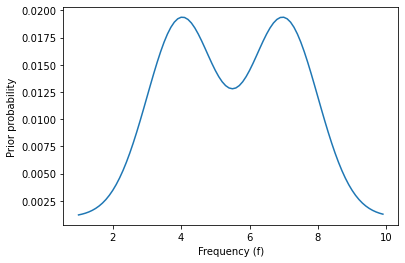

In [4]:
# prior
prior = prior_array(freq_input, p_back = 0.2, p_low = 0.5)
plt.plot(freq_input, prior)
plt.xlabel('Frequency (f)')
plt.ylabel('Prior probability')

Text(0, 0.5, 'Frequency (f)')

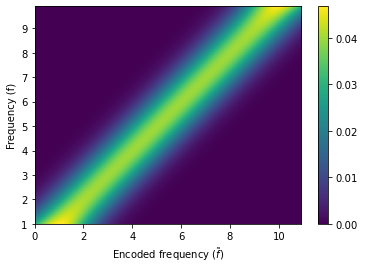

In [5]:
# likelihood
likelihood = likelihood_array(freq_points, freq_input)
fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(likelihood, extent=[freq_points[0], freq_points[-1], freq_input[-1], freq_input[0]])
cbar = plt.colorbar(colormap, ax=ax)
ax.invert_yaxis()
ax.set_xlabel('Encoded frequency ($\~{f}$)')
ax.set_ylabel('Frequency (f)')

Text(0.5, 0, 'Estimated Frequency ($\\^{f}$)')

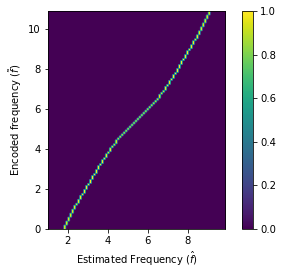

In [6]:
# posterior and frequency estimated by observer
posterior = posterior_array(freq_input, freq_points, prior, likelihood)
freq_estimation = estimated_freq(freq_input, posterior)
fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(freq_estimation, extent=[freq_input[0], freq_input[-1], freq_points[-1], freq_points[0]])
cbar = plt.colorbar(colormap, ax=ax)
ax.invert_yaxis()
ax.set_ylabel('Encoded frequency ($\~{f}$)')
ax.set_xlabel('Estimated Frequency ($\^{f}$)')

Text(0, 0.5, 'Prob')

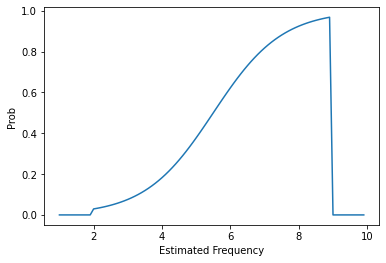

In [7]:
# probability of choosing high given the estimated frequency tone
sigmoid_weight = sigmoid_response(freq_input, prior_low_mean=4, prior_low_sigma=1, 
                                     prior_high_mean=7, prior_high_sigma=1)
plt.plot(freq_input, sigmoid_weight)
plt.xlabel('Estimated Frequency')
plt.ylabel('Prob')

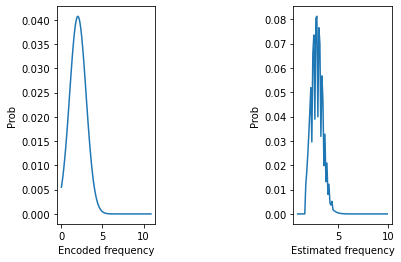

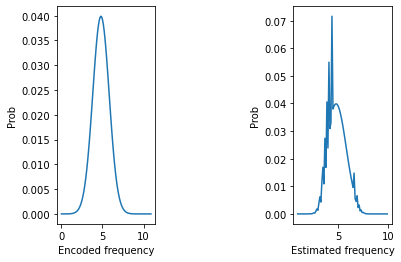

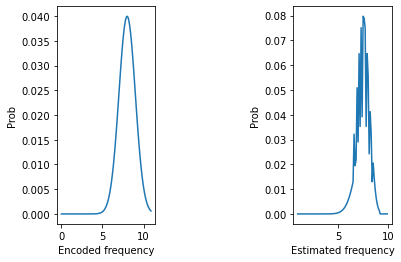

0.02514163387322928


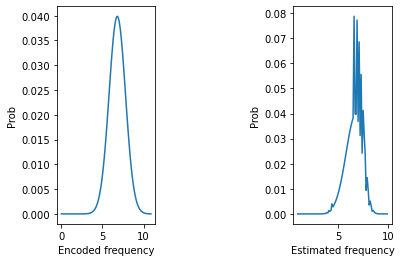

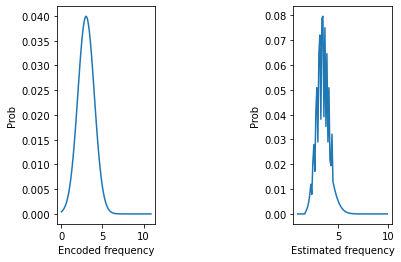

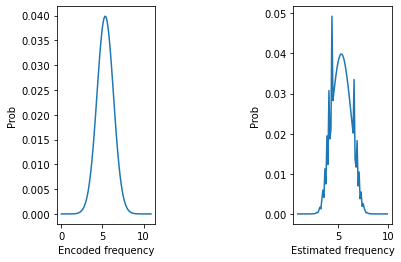

0.04703125459291959


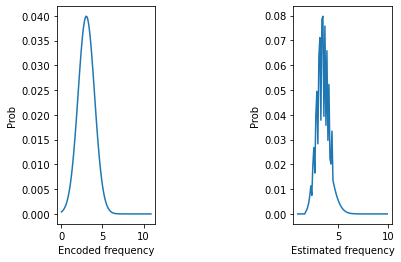

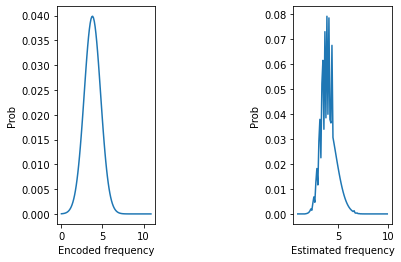

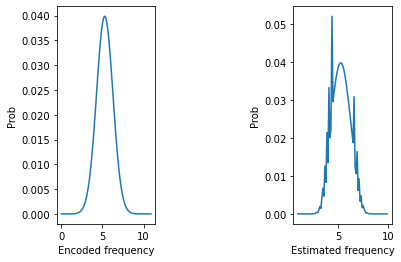

0.01357678896642063


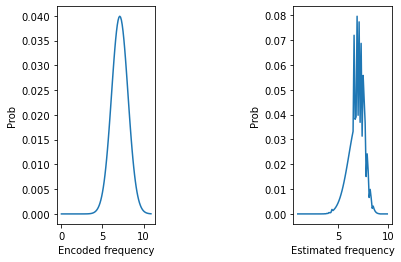

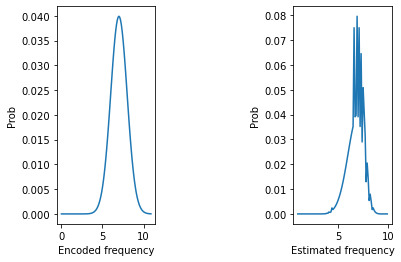

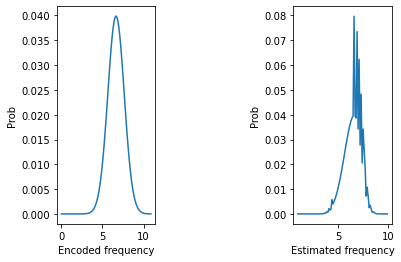

0.4139890513105991


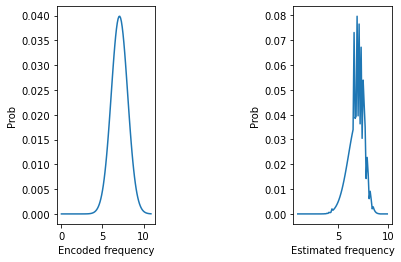

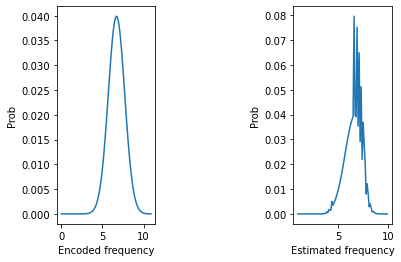

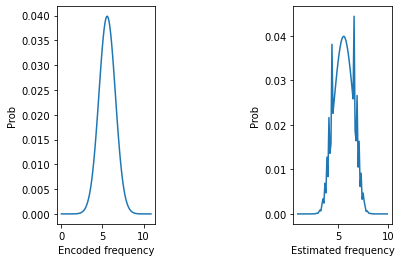

0.2819465437598192


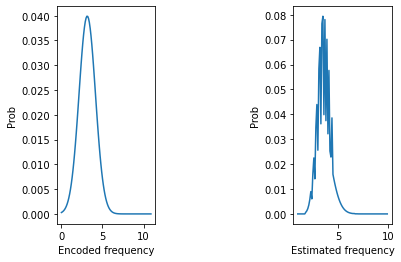

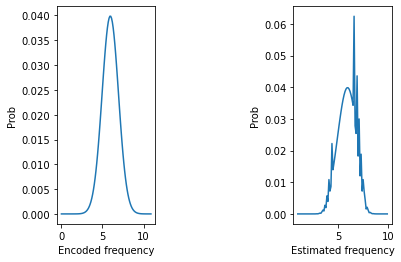

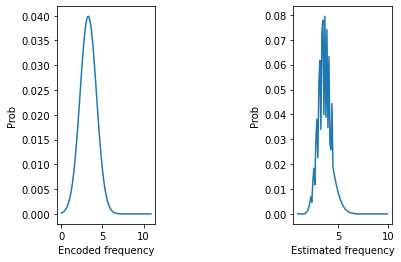

0.014035342140201551


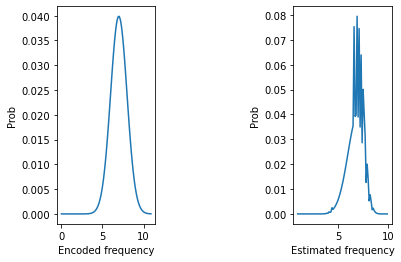

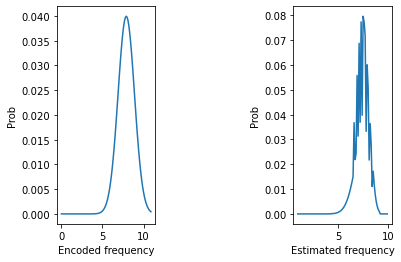

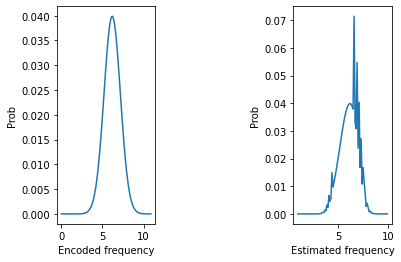

0.40496181110382157


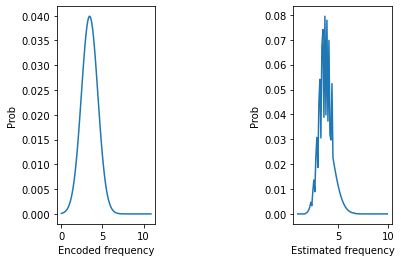

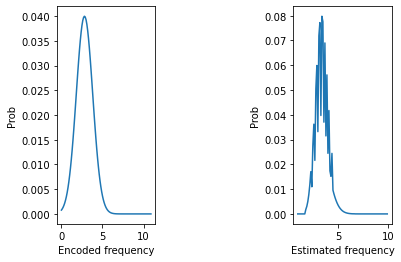

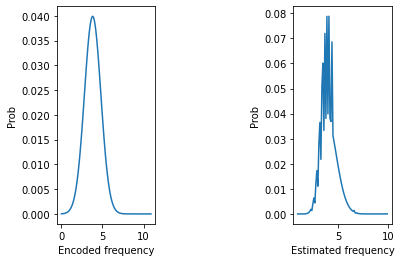

0.00470726423375003


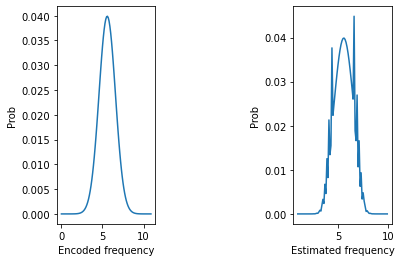

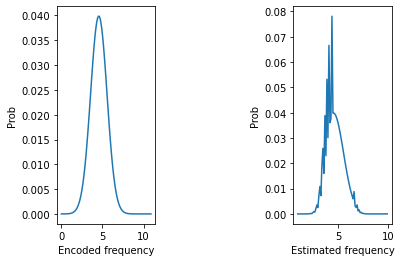

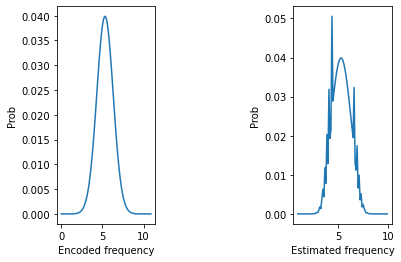

0.07706366133680737


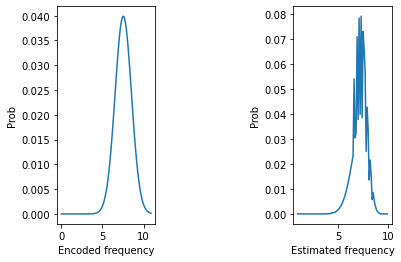

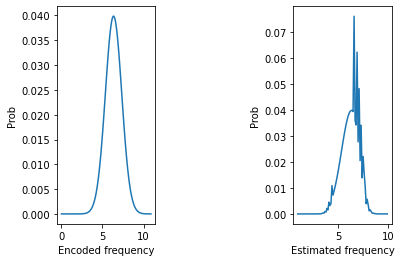

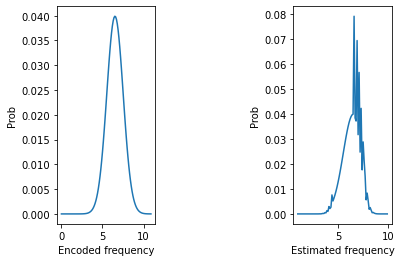

0.3710647534924517


In [8]:
probability_of_choosing_high = []
for trial in range(len(trial_tones)):
    choice_high = 1
    for tone in trial_tones[trial]:
        encoding_of_true_freq = encoding_given_true_freq(freq_points, tone, sigma=1)
        marginal = probability_estimated_freq(freq_estimation, encoding_of_true_freq)
        fig = plt.figure()
        ax1 = fig.add_subplot(133)
        ax1.plot(freq_input, marginal)
        ax1.set_xlabel('Estimated frequency'); ax1.set_ylabel('Prob')
        ax2 = fig.add_subplot(131)
        ax2.plot(freq_points, encoding_of_true_freq)
        ax2.set_xlabel('Encoded frequency'); ax2.set_ylabel('Prob')
        plt.show()
        choice_high *= probability_high_response(sigmoid_weight, marginal)
    probability_of_choosing_high.append(choice_high)
    print(choice_high)